In [1]:
import numpy as np
import os
import xarray as xr
import pygmt
import pandas as pd

In [98]:
def plot_fg_subplots(fgdata, savepath):
    annot_locs = {'Forge River': [-72.83288, 40.80620986],
                  'Seatuck Cove': [-72.7260 - .030, 40.8094],
                 }
    import yaml
    with open("/home/catherinej/claw_code/src/claw_code/post/gmt_config.yml", "r") as ymlfile:
        cfg = yaml.safe_load(ymlfile)
    fig = pygmt.Figure()
    
    with pygmt.config(**cfg['region_map']):
        region = cfg['moriches_map']['region']
        frame_params = cfg['moriches_map']['basemap_frame']
        grid = '/home/catherinej/bathymetry/moriches.nc'
        grd = pygmt.grdclip(grid=grid, below=[0.0,-50])
        with fig.subplot(nrows=int(len(fgdata)/2), ncols=2, subsize=('15c', '7.5c'), frame='lrtb',
                         autolabel='+jTL+o1.65c/0.5c+gwhite', sharex='b', sharey='l', 
                         margins=['-.5c','-.5c', '.75c', '.75c']):
            for i, key in enumerate(fgdata):
                with fig.set_panel(panel=i):
                    fig.basemap(region=region, projection='M?', frame=frame_params)
                    pygmt.makecpt(cmap='gray', series=[-50,50], reverse=True)
                    fig.grdimage(grid=grd, cmap=True, shading=True)
                    pygmt.makecpt(cmap='lajolla', series=[0,1.5, 0.10],continuous=False, reverse=True)#, truncate='0.2/nan') #, truncate='nan/0.75')

                    fig.grdimage(grid=fgdata[key]['data'], cmap=True, nan_transparent=True)
                    fig.colorbar(position='jBC+o1.65c/.15c+w6/.5h+mc',
                                frame=['xa.5f.25+l"Sea Surface (m)"'],
                                )
                    pygmt.makecpt(cmap='acton', series=[-2.0, 0, 0.10])
                    fig.plot(data='mesh.dat', fill='+z', pen="1p", close=True,cmap=True)
                    
                    
    fig.show()
    
                        

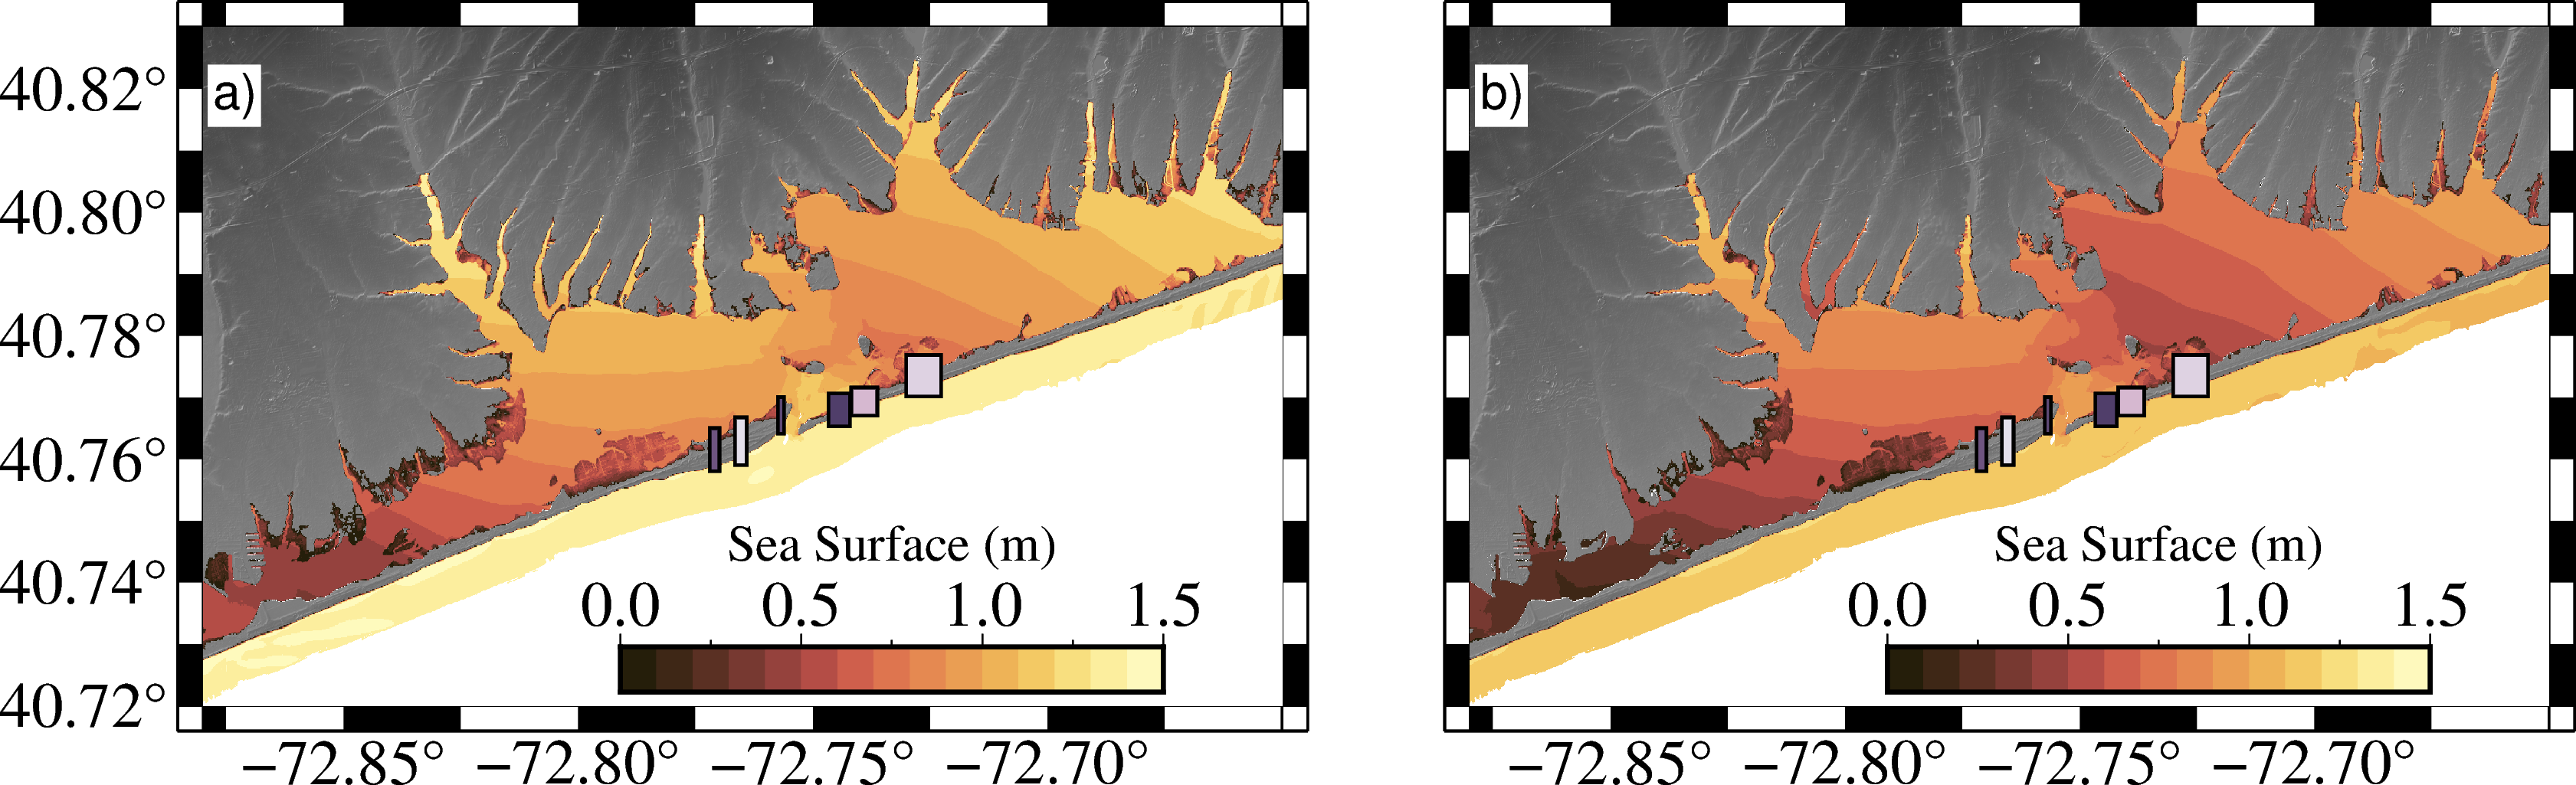

In [99]:
results_300k = '/home/catherinej/BarrierBreach/data/fg_nc_300k_radius/'
results_300 = '/home/catherinej/300km_breach/300km_results/fgmax/'
breaches = '/home/catherinej/300km_breach/no_breach_300km/breach.data'
files = os.listdir(results_300)
# for f in files:
f = files[0]
new = xr.open_dataset(os.path.join(results_300, f))
old = xr.open_dataset(os.path.join(results_300k, f))

fgdata = {
'Original': {'data': old.eta.where(old.eta > 0),
              'name': '300k km radius'},
'New' : {'data': new.eta.where(new.eta > 0),
           'name': '300 km radius'}}
plot_fg_subplots(fgdata, './')

In [28]:
with open(breaches) as f:
    data = f.read()
    data = data.split('\n')
    data = [line.split(' ') for line in data]
    data.pop(0)
    names = data.pop(0)
    if 'depth' not in map(str.lower, names):
        names.append('Depth')
    d = {k: v for k,v in zip(names, data) if k != 'sigma,'}
    df = pd.DataFrame(d)
    df.columns = [col.replace(',', '') for col in df.columns]
    df = df.apply(pd.to_numeric, errors='ignore')
    df.columns = [x.title() for x in df.columns]


In [30]:
df

,Breach_Trigger,South,North,West,East,Mu,Time_Factor,Start_Time,End_Time,Depth
0,1,40.770121,40.776830,-72.730156,-72.722699,-72.728378,0.002,214219.9,221419.9,-0.152593
1,1,40.767005,40.771566,-72.741864,-72.736314,-72.739811,0.002,213647.4,220847.4,-0.378817
2,1,40.765269,40.770601,-72.746720,-72.742147,-72.744832,0.002,214603.3,221803.3,-1.759024
3,1,40.764085,40.770000,-72.757493,-72.756182,-72.758208,0.002,214556.6,221756.6,-1.637777
4,1,40.759000,40.766711,-72.766651,-72.764132,-72.765685,0.002,216243.2,223443.2,-0.069804
5,1,40.758000,40.765000,-72.772045,-72.769959,-72.770963,0.002,215135.5,222335.5,-1.508870


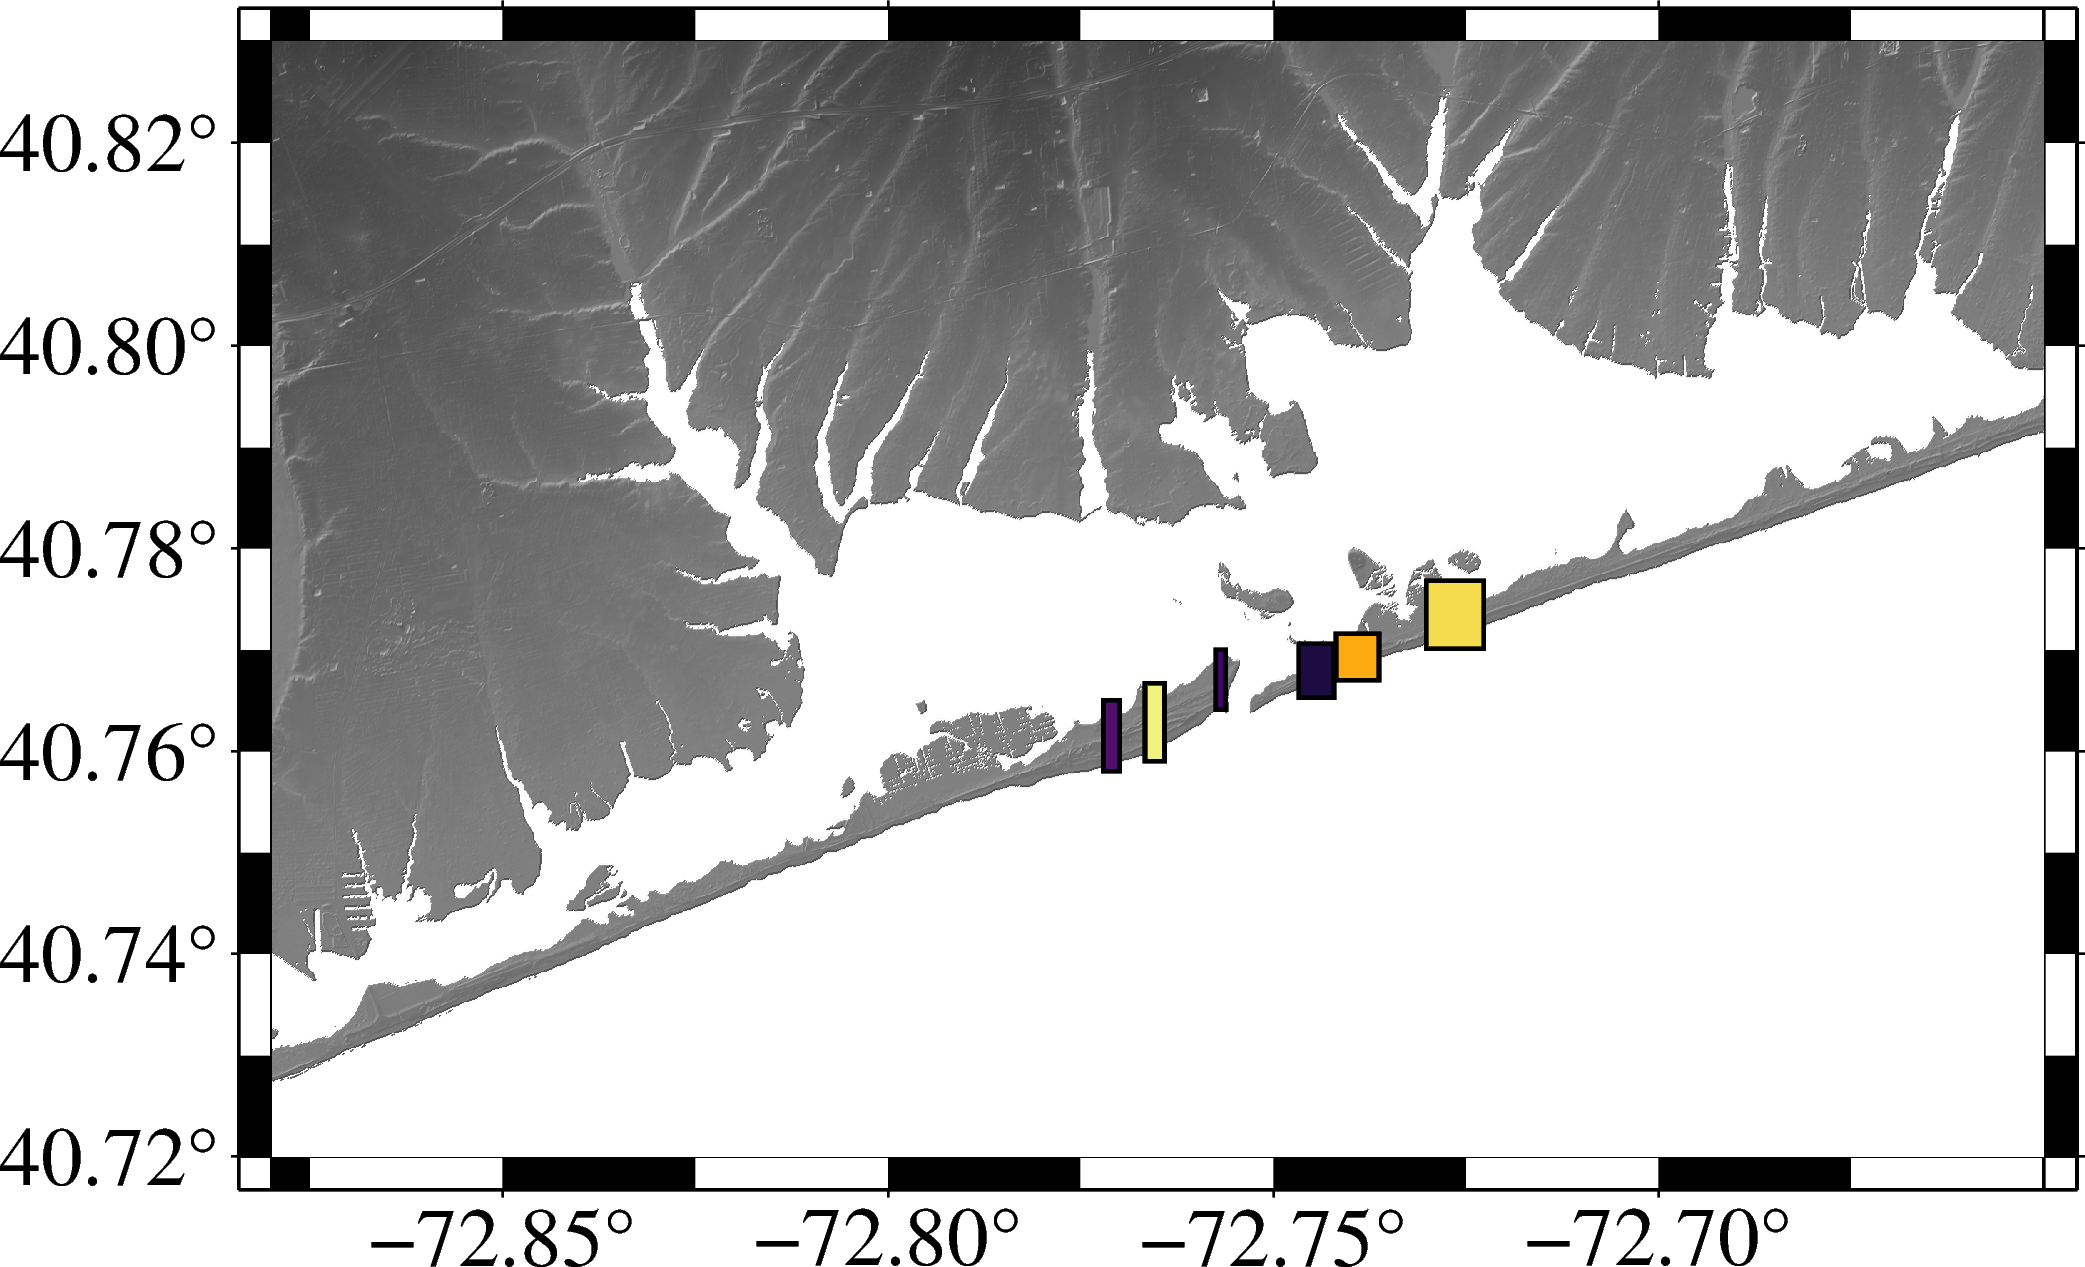

In [93]:
import yaml
fig = pygmt.Figure()

with open("/home/catherinej/claw_code/src/claw_code/post/gmt_config.yml", "r") as ymlfile:
    cfg = yaml.safe_load(ymlfile)
fig = pygmt.Figure()

with pygmt.config(**cfg['region_map']):
    region = cfg['moriches_map']['region']
    frame_params = cfg['moriches_map']['basemap_frame']
    grid = '/home/catherinej/bathymetry/moriches.nc'
    grd = pygmt.grdclip(grid=grid, below=[0.0,-50])
    fig.basemap(region=region, projection='M15', frame=frame_params)
    pygmt.makecpt(cmap='gray', series=[-50,50], reverse=True)
    fig.grdimage(grid=grd, cmap=True, shading=True)
    pygmt.makecpt(cmap='inferno', series=[-2.0, 0, 0.05])
    fig.plot(data='mesh.dat', fill='+z', pen="1p", close=True,cmap=True )

    # Show the map
# fig.show()
    fig.show()

In [75]:
breach = df[[ 'West', 'East', 'South', 'North', 'Depth']]
breach

,West,East,South,North,Depth
0,-72.730156,-72.722699,40.770121,40.776830,-0.152593
1,-72.741864,-72.736314,40.767005,40.771566,-0.378817
2,-72.746720,-72.742147,40.765269,40.770601,-1.759024
3,-72.757493,-72.756182,40.764085,40.770000,-1.637777
4,-72.766651,-72.764132,40.759000,40.766711,-0.069804
5,-72.772045,-72.769959,40.758000,40.765000,-1.508870


In [92]:
with open("mesh.dat", "w") as fp:
    # Loop through rows in the dataframe and add closed polygons to the figure
    for _, row in breach.iterrows():
        # Extract coordinates for the polygon
        west, east, south, north, depth = row['West'], row['East'], row['South'], row['North'], row['Depth']
        print(_, depth)

        fp.write(f"> -Z{depth}\n")
        fp.write(f"{west} {south}\n")
        fp.write(f"{west} {north}\n")
        fp.write(f"{east} {north}\n")
        fp.write(f"{east} {south}\n")
        fp.write(f"{west} {south}\n")
    

0 -0.1525934416727425
1 -0.3788170909149126
2 -1.7590240802411916
3 -1.6377773715878183
4 -0.0698042053711054
5 -1.5088701690067037


In [91]:
with open('mesh.dat') as f:
    print(f.readlines())

['> -Z0 -0.1525934416727425\n', '-72.730156 40.770121\n', '-72.730156 40.77683\n', '-72.722699 40.77683\n', '-72.722699 40.770121\n', '-72.730156 40.770121\n', '> -Z1 -0.3788170909149126\n', '-72.741864 40.767005\n', '-72.741864 40.771566\n', '-72.736314 40.771566\n', '-72.736314 40.767005\n', '-72.741864 40.767005\n', '> -Z2 -1.7590240802411916\n', '-72.74672 40.765269\n', '-72.74672 40.770601\n', '-72.742147 40.770601\n', '-72.742147 40.765269\n', '-72.74672 40.765269\n', '> -Z3 -1.6377773715878183\n', '-72.757493 40.764085\n', '-72.757493 40.77\n', '-72.756182 40.77\n', '-72.756182 40.764085\n', '-72.757493 40.764085\n', '> -Z4 -0.0698042053711054\n', '-72.766651 40.759\n', '-72.766651 40.766711\n', '-72.764132 40.766711\n', '-72.764132 40.759\n', '-72.766651 40.759\n', '> -Z5 -1.5088701690067037\n', '-72.772045 40.758\n', '-72.772045 40.765\n', '-72.769959 40.765\n', '-72.769959 40.758\n', '-72.772045 40.758\n']
